<a href="https://colab.research.google.com/github/jaswanthgodavathi/smarte/blob/main/wind_power_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np # linear algebra
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df=pd.read_csv('Location1.csv')


In [6]:
df

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
...,...,...,...,...,...,...,...,...,...,...
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606


In [7]:
df['Time']=pd.to_datetime(df['Time'])

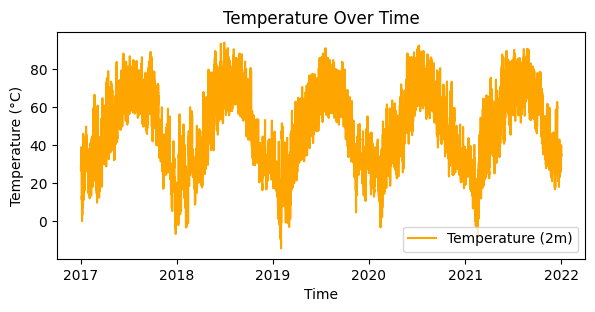

In [10]:
# Plotting key features
plt.figure(figsize=(15, 10))

# Temperature
plt.subplot(3, 2, 1)
plt.plot(df['Time'], df['temperature_2m'], label='Temperature (2m)', color='orange')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

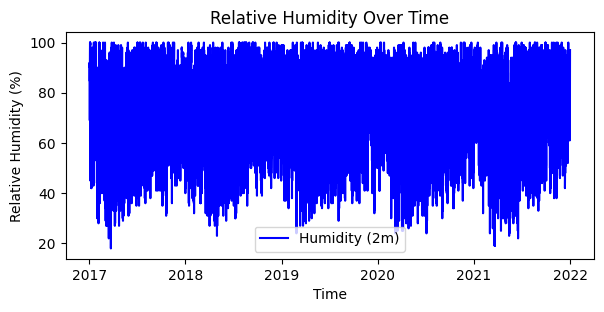

In [14]:

# Relative Humidity
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 2)
plt.plot(df['Time'], df['relativehumidity_2m'], label='Humidity (2m)', color='blue')
plt.title('Relative Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.legend()

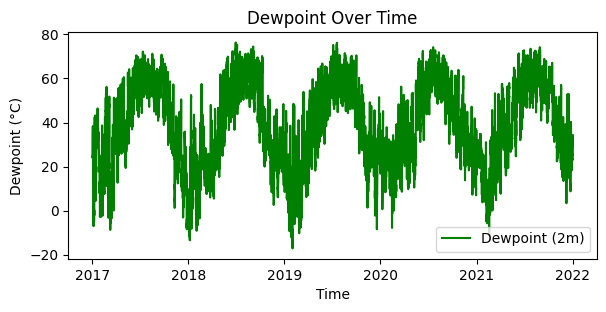

In [18]:
# Dewpoint
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 3)
plt.plot(df['Time'], df['dewpoint_2m'], label='Dewpoint (2m)', color='green')
plt.title('Dewpoint Over Time')
plt.xlabel('Time')
plt.ylabel('Dewpoint (°C)')
plt.legend()

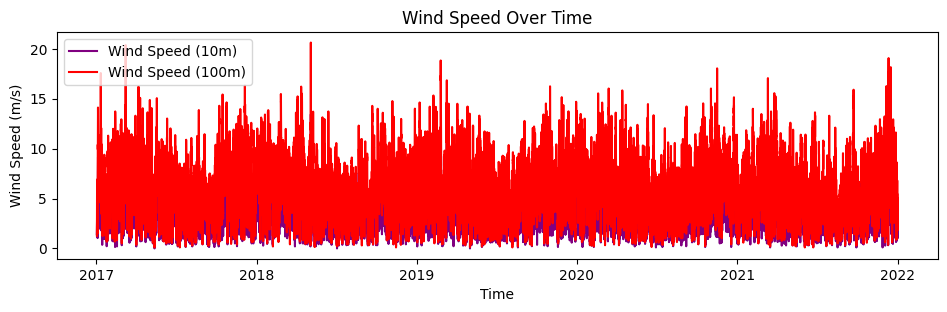

In [16]:
# Wind Speed
plt.figure(figsize=(25, 10))
plt.subplot(3, 2, 4)
plt.plot(df['Time'], df['windspeed_10m'], label='Wind Speed (10m)', color='purple')
plt.plot(df['Time'], df['windspeed_100m'], label='Wind Speed (100m)', color='red')
plt.title('Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()


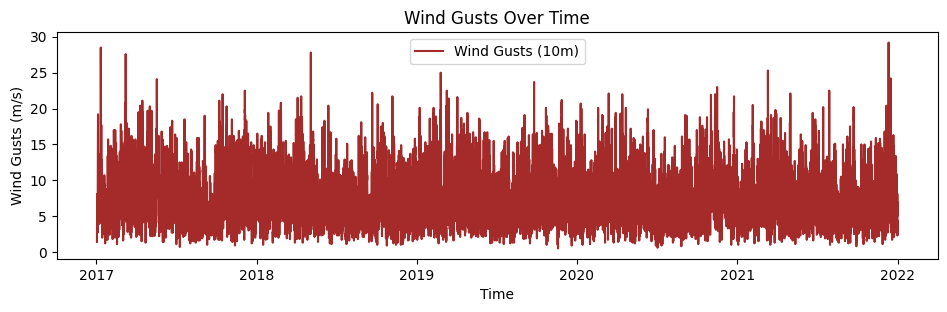

In [19]:
# Wind Gusts
plt.figure(figsize=(25, 10))
plt.subplot(3, 2, 5)
plt.plot(df['Time'], df['windgusts_10m'], label='Wind Gusts (10m)', color='brown')
plt.title('Wind Gusts Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Gusts (m/s)')
plt.legend()

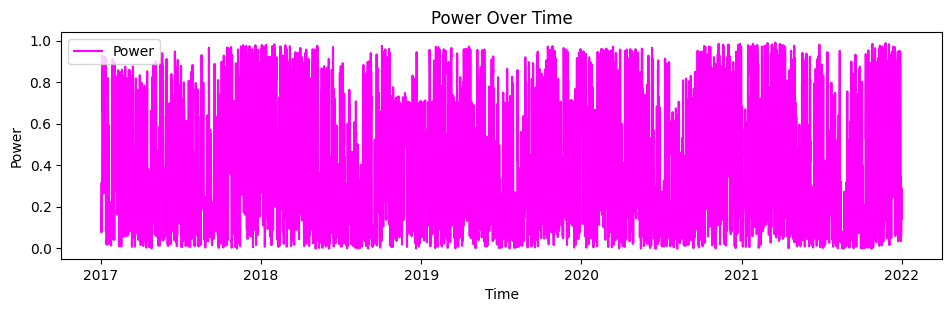

In [21]:
# Power
plt.figure(figsize=(25, 10))
plt.subplot(3, 2, 6)
plt.plot(df['Time'], df['Power'], label='Power', color='magenta')
plt.title('Power Over Time')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()

WHICH FEATURE IS EFFECTING POWER CONSUMPTION

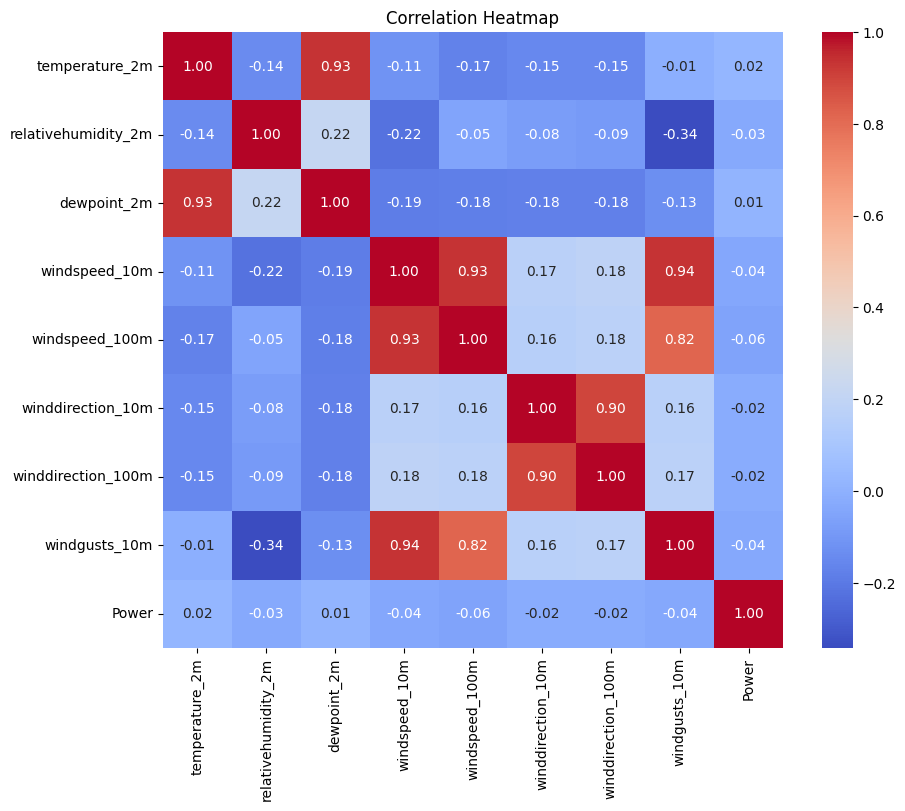

In [38]:
correlation_matrix = df.corr()

# Plotting the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




In [25]:
df.corr()['Power'].sort_values(ascending=False)

,Power
Power,1.000000
windspeed_100m,0.778704
windspeed_10m,0.732801
windgusts_10m,0.662677
winddirection_100m,0.171619
winddirection_10m,0.157623
Time,-0.011625
relativehumidity_2m,-0.070360
temperature_2m,-0.207101
dewpoint_2m,-0.223739


In [26]:
df=df.set_index('Time')

In [28]:
#Shifiting by one row (lag)
df['Power']=(df['Power']-df['Power'].shift(1)).apply(lambda x:1 if x>0 else 0)

In [29]:
df

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0
2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0
2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0


In [31]:
#prepare the data into the appropriate format for training the LSTM
def df_to_Xy(df,lag):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df)-lag):
        rows=[[r] for r in df_as_np[i:i+lag]]
        label=df_as_np[i+lag,df.columns.get_loc('Power')]
        X.append(rows)
        y.append(label)
    return np.array(X), np.array(y)

In [32]:
X,y=df_to_Xy(df,50)

In [33]:
X.shape,y.shape

((43750, 50, 1, 9), (43750,))

In [34]:
train_idx=int(len(X)*0.8)
val_idx=int(len(X)*0.9)

X_train,y_train=X[:train_idx] ,y[:train_idx]
X_val,y_val=X[train_idx:val_idx], y[train_idx:val_idx]
X_test,y_test=X[val_idx:], y[val_idx:]

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_val=X_val.reshape(X_val.shape[0], X_val.shape[1], -1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((35000, 50, 9), (35000,), (4375, 50, 9), (4375,), (4375, 50, 9), (4375,))

BUILDING LSTM MODEL

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer
from keras.optimizers import Adam

In [36]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(50, 9)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9289 - loss: 0.2148 - val_accuracy: 0.9680 - val_loss: 0.1415
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9663 - loss: 0.1465 - val_accuracy: 0.9680 - val_loss: 0.1406
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9673 - loss: 0.1433 - val_accuracy: 0.9680 - val_loss: 0.1401
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9661 - loss: 0.1473 - val_accuracy: 0.9680 - val_loss: 0.1406
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9655 - loss: 0.1490 - val_accuracy: 0.9680 - val_loss: 0.1406
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.9655 - loss: 0.1488 - val_accuracy: 0.9680 - val_loss: 0.1400
Epoch 7/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9674 - loss: 0.1423 - val_accuracy: 0.9680 - val_loss: 0.1403
Epoch 8/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9675 - loss: 0

In [40]:
# Extract the last `lag` rows to start the prediction
last_sequence = df.iloc[-50:].to_numpy()  # Adjust 50 based on your lag value
last_sequence = last_sequence.reshape((1, 50, 9))  # Reshape to match model input shape


In [44]:
future_predictions = []
for _ in range(5):  # Predict for the next 5 days
    # Predict using the model
    prediction = model.predict(last_sequence)

    # Append the prediction to the results
    future_predictions.append(prediction[0, 0])  # Assuming 1 output

    # Update the input sequence with the new prediction
    # Replace the oldest row with the new prediction (simulating rolling window)
    new_row = last_sequence[0, -1].copy()  # Copy the last row
    new_row[-1] = prediction[0, 0]  # Replace the last feature ('Power') with predicted value
    last_sequence = np.append(last_sequence[:, 1:, :], [[new_row]], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


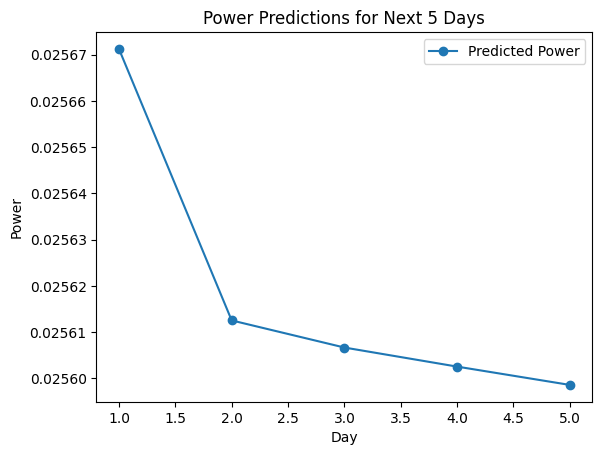

In [42]:
import matplotlib.pyplot as plt

# Plot the predictions
plt.plot(range(1, 6), future_predictions, marker='o', label='Predicted Power')
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('Power Predictions for Next 5 Days')
plt.legend()
plt.show()


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

In [46]:
# Define BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=64), input_shape=(50, 9)))
bilstm_model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:

# Compile the model
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the BiLSTM model
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9410 - loss: 0.1891 - val_accuracy: 0.9680 - val_loss: 0.1406
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.9651 - loss: 0.1506 - val_accuracy: 0.9680 - val_loss: 0.1395
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9660 - loss: 0.1466 - val_accuracy: 0.9680 - val_loss: 0.1395
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9673 - loss: 0.1425 - val_accuracy: 0.9680 - val_loss: 0.1390
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9666 - loss: 0.1444 - val_accuracy: 0.9680 - val_loss: 0.1392
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9666 - loss: 0.1451 - val_accuracy: 0.9680 - val_loss: 0.1389
Epoch 7/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.9648 - loss: 0.1516 - val_accuracy: 0.9680 - val_loss: 0.1395
Epoch 8/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9679 - loss: 0

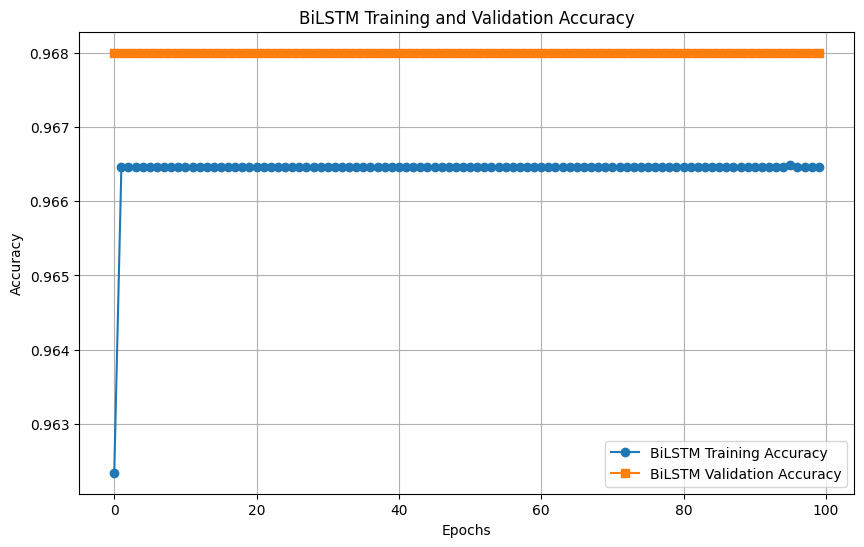

In [49]:
#Training and Validation accuracy
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM Training Accuracy', marker='o')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Validation Accuracy', marker='s')

plt.title('BiLSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


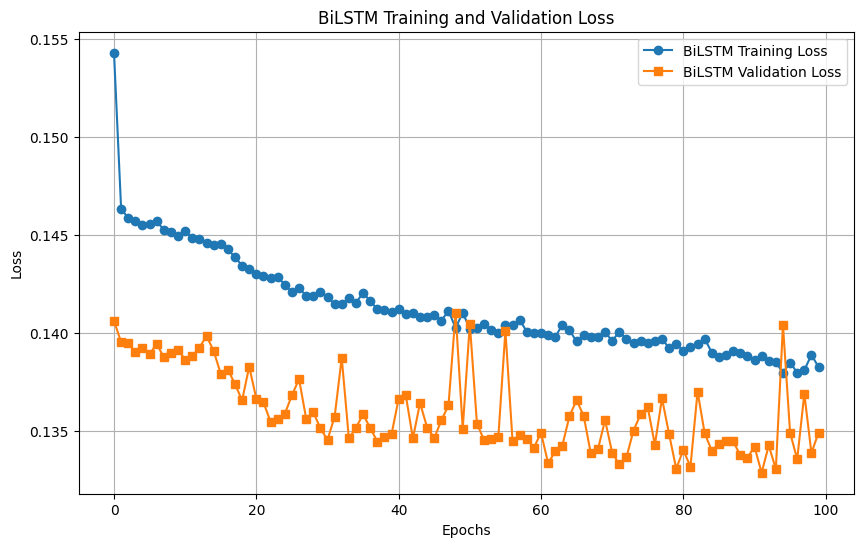

In [50]:
 # Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss', marker='o')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss', marker='s')

plt.title('BiLSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


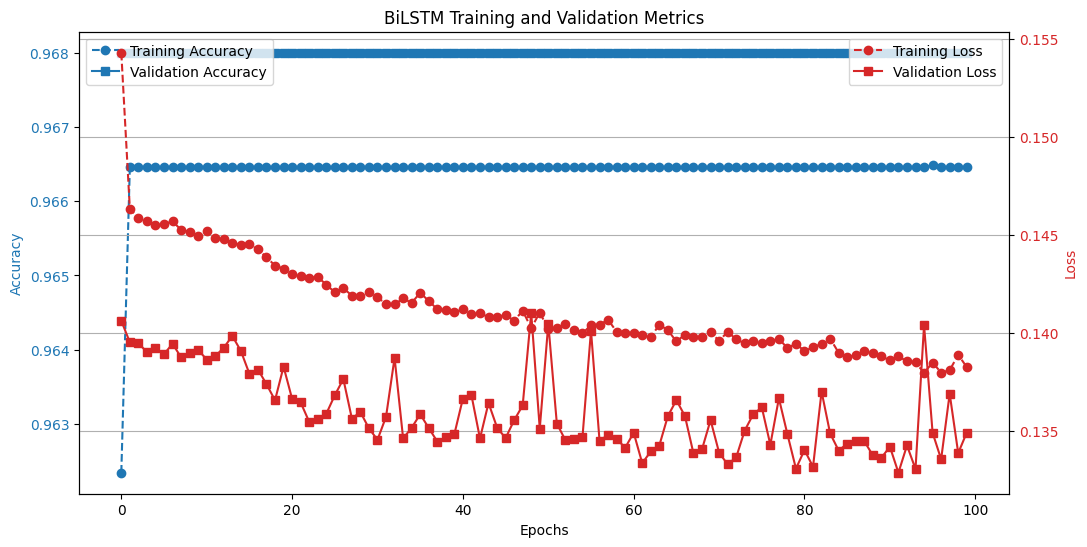

In [51]:
# Combined plot for accuracy and loss
fig, ax1 = plt.subplots(figsize=(12, 6))

# Accuracy
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(history_bilstm.history['accuracy'], label='Training Accuracy', color='tab:blue', linestyle='--', marker='o')
ax1.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy', color='tab:blue', linestyle='-', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(history_bilstm.history['loss'], label='Training Loss', color='tab:red', linestyle='--', marker='o')
ax2.plot(history_bilstm.history['val_loss'], label='Validation Loss', color='tab:red', linestyle='-', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

plt.title('BiLSTM Training and Validation Metrics')
plt.grid(True)
plt.show()
